# Tarea semanal 6

Yanina Corsaro

1) Implemente las funciones para generar las siguientes ventanas w(k):

Bartlett ó triangular
Hann
Blackman
Flat-top
Ayuda: Puede consultar el capítulo 7.3 del mismo libro para obtener las expresiones analíticas de cada ventana.

a) Para cada ventana grafique w(k) y |W(Ω)|, para N = 1000 muestras, normalizando w(k) de forma tal que la amplitud máxima de |W(Ω)| (lóbulo principal) sea 0 dB.

Ayuda: Posiblemente convenga utilizar zero-padding para visualizar mejor |W(Ω)|.

b) Construya una tabla en la que figuren dos mediciones de la anchura del lóbulo principal de cada ventana:

Ω0 será la frecuencia del primer cruce por cero, es decir |W(Ω)| =0 y 
Ω1, aquella frecuencia tal que |W(Ω1)|=2√2∨−3 dB y 
el valor de transferencia máxima de los lóbulos secundarios (expresado en dB)
W2=max{|W(Ω)|},  ∀ Ω≥Ω0


C:\Users\LeanYani\anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10
C:\Users\LeanYani\anaconda3\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in log10
C:\Users\LeanYani\anaconda3\lib\site-packages\ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log10
C:\Users\LeanYani\anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: divide by zero encountered in log10
C:\Users\LeanYani\anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log10


(-150, 0)

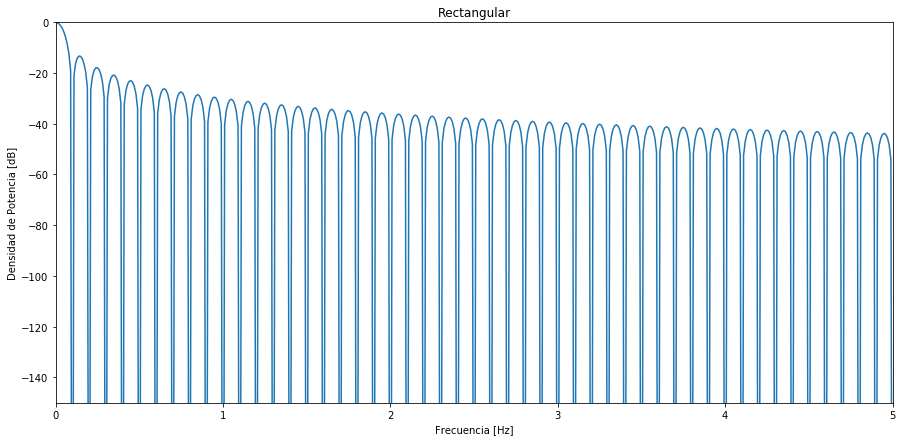

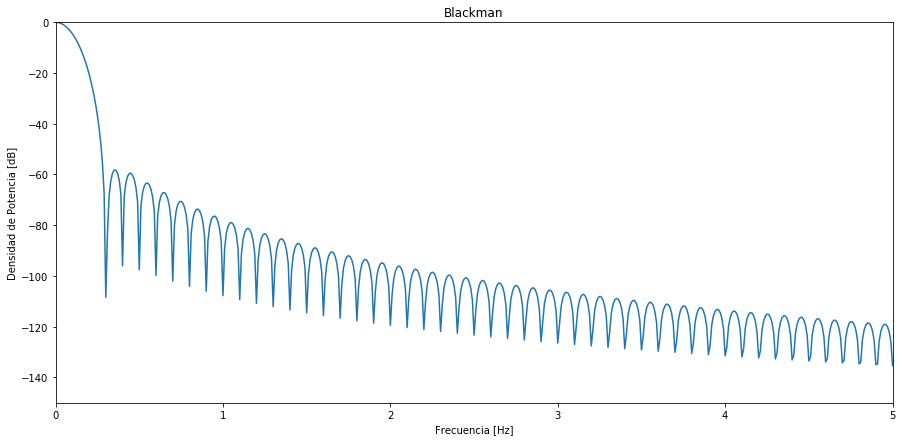

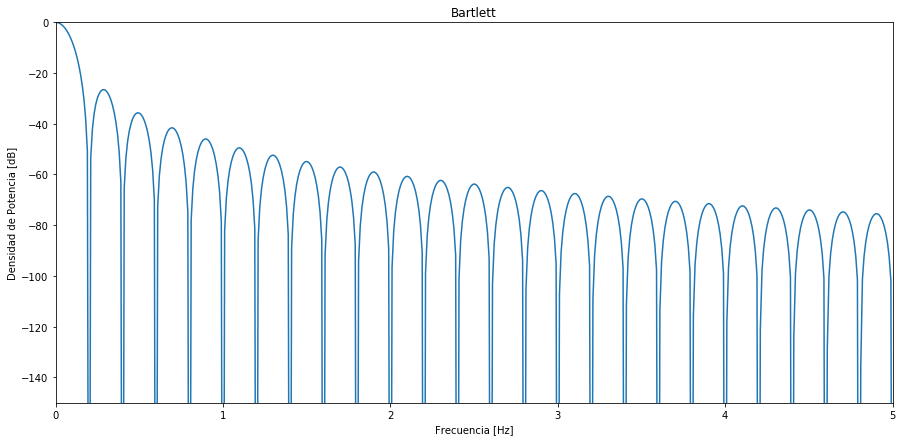

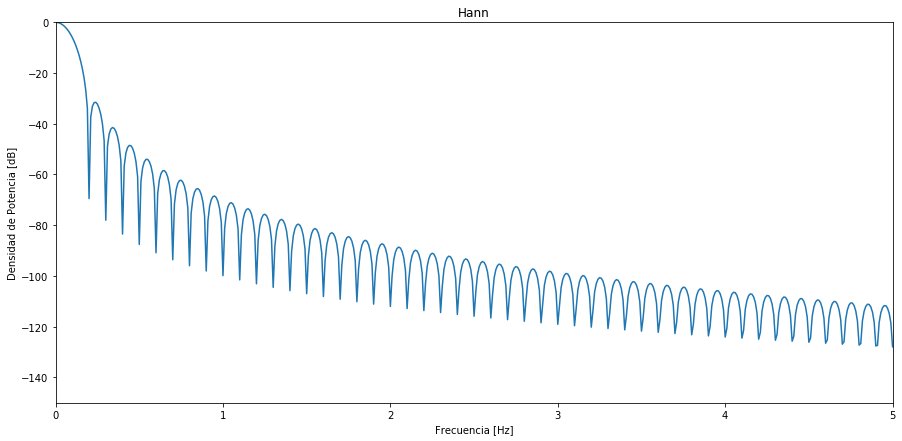

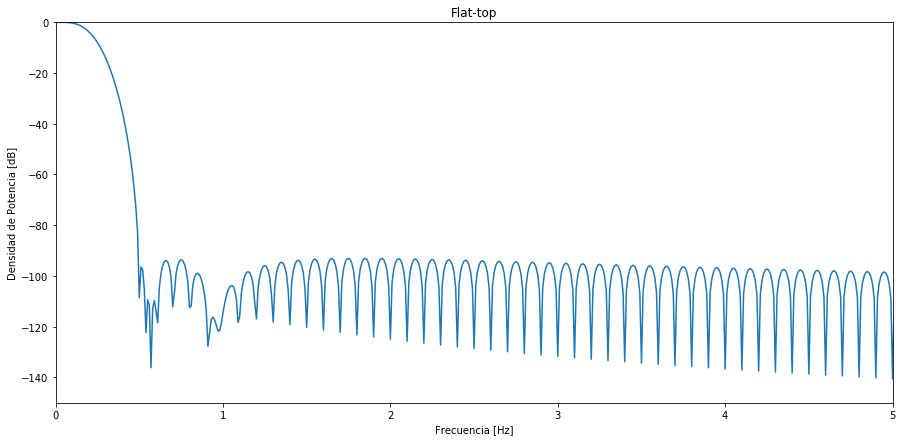

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from sen import mi_funcion_sen
import scipy.signal as sig
from scipy.fftpack import fft, fftfreq

mpl.rcParams['figure.figsize'] = (15,7) 

# parámetros de la senoidal
N  = 1000 # muestras
Np = N*10
fs = 1000 # Hz
dt = 1/(fs)
df = fs/N # resolución espectral


w0 = np.ones_like(np.arange(N))
ft_0 = fft(w0,Np)
ft_0 = np.abs(ft_0)/np.amax(np.abs(ft_0))

w1 = sig.blackman(N)
ffc = fftfreq(Np, d=1/fs)
ff = fftfreq(Np, d=1/fs)*(fs/Np)
ft_1 = fft(w1,Np)
ft_1 = np.abs(ft_1)/np.amax(np.abs(ft_1))
f = np.linspace(0, (N-1), N)*df

w2 = sig.bartlett(N)
ft_2 = fft(w2,Np)
ft_2 = np.abs(ft_2)/np.amax(np.abs(ft_2))

w3 = sig.hann(N)
ft_3 = fft(w3,Np)
ft_3 = np.abs(ft_3)/np.amax(np.abs(ft_3))

w4 = sig.flattop(N)
ft_4 = fft(w4,Np)
ft_4 = np.abs(ft_4)/np.amax(np.abs(ft_4))

    
ff_os = ff



plt.figure(0)

plt.plot( ff_os, 20* np.log10( np.abs(ft_0)))
#plt.plot( f[f <= fs/2], 10* np.log10( 2*np.abs(w0[f <= fs/2])**2), color='orange', ls='dotted')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Rectangular' )
axes_hdl = plt.gca()
plt.xlim((0,5))
plt.ylim((-150,0))

plt.figure(1)

plt.plot( ff_os, 20* np.log10( np.abs(ft_1)))
#plt.plot( f[f <= fs/2], 10* np.log10( 2*np.abs(w1[f <= fs/2])**2), color='orange', ls='dotted')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Blackman' )
axes_hdl = plt.gca()
plt.xlim((0,5))
plt.ylim((-150,0))

plt.figure(2)

plt.plot( ff_os, 20* np.log10( np.abs(ft_2)))
#plt.plot( f[f <= fs/2], 10* np.log10( 2*np.abs(w2[f <= fs/2])**2), color='orange', ls='dotted')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Bartlett' )
axes_hdl = plt.gca()
plt.xlim((0,5))
plt.ylim((-150,0))

plt.figure(3)

plt.plot( ff_os, 20* np.log10( np.abs(ft_3)))
#plt.plot( f[f <= fs/2], 10* np.log10( 2*np.abs(w3[f <= fs/2])**2), color='orange', ls='dotted')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Hann' )
axes_hdl = plt.gca()
plt.xlim((0,5))
plt.ylim((-150,0))


plt.figure(4)

plt.plot( ff_os, 20* np.log10( np.abs(ft_4)))
#plt.plot( f[f <= fs/2], 10* np.log10( 2*np.abs(w4[f <= fs/2])**2), color='orange', ls='dotted')
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
plt.title('Flat-top' )
axes_hdl = plt.gca()
plt.xlim((0,5))
plt.ylim((-150,0))



In [57]:

from pandas import DataFrame
from IPython.display import HTML

wt = [ft_0, ft_1, ft_2, ft_3, ft_4]

tus_resultados1 = []
tus_resultados2 = []
tus_resultados3 = []

# calculo los parámetros pedidos
for w in wt:
        
    for f in ffc:
        
        if w[int(f)]<0.001: 
            # 1er cruce por 0
            tus_resultados1.append(f*np.sqrt(fs)/N)
            # 2do máximo (sin contar el lóbulo principal)
            tus_resultados3.append(20* np.log10( np.abs(np.amax(w[int(f): int(f)+10])))) 
            break
            
  
        
        
    if f==ffc[-1]:
        tus_resultados1.append('none')
        
    for f in ffc:
        # aca acoté la √2/2 porque si lo comparaba exacto no me daba ningún valor
        if w[int(f)]>=0.69 and w[int(f)]<0.76:
            tus_resultados2.append(f*np.sqrt(fs)/N)
            break
    if f==ffc[-1]:
        tus_resultados2.append('none')

# dataframe para visualizar los datos

d = {'Ω0':tus_resultados1, 'Ω1':tus_resultados2, 'W2':tus_resultados3}
df = DataFrame(data = d,
               index=['Rectangular', 
                      'Blackman', 
                      'Bartlett', 
                      'Hann',
                      'Flat-top'])
HTML(df.to_html())

,Ω0,Ω1,W2
Rectangular,0.316228,0.126491,-13.301404
Blackman,0.917061,0.252982,-58.253376
Bartlett,0.632456,0.189737,-26.551192
Hann,0.632456,0.221359,-31.527061
Flat-top,1.486271,0.569210,-65.904651
